In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**pandas could not encode my csv file so I used that keyword**

In [339]:
df=pd.read_csv("cancer_reg.csv",encoding='latin-1')

In [13]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

# Preprocessing & Feature engineering

<AxesSubplot:>

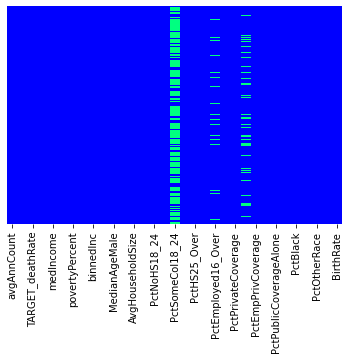

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="winter")

we have a lot of missind data in PctSomeCol18_24 so I have to remove it

In [340]:
df=df.drop("PctSomeCol18_24",axis=1)

In [28]:
df.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over         152
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: i

**In order to see whether we can findout a good value for missing values to predict or replace them using that we have to find correlation**

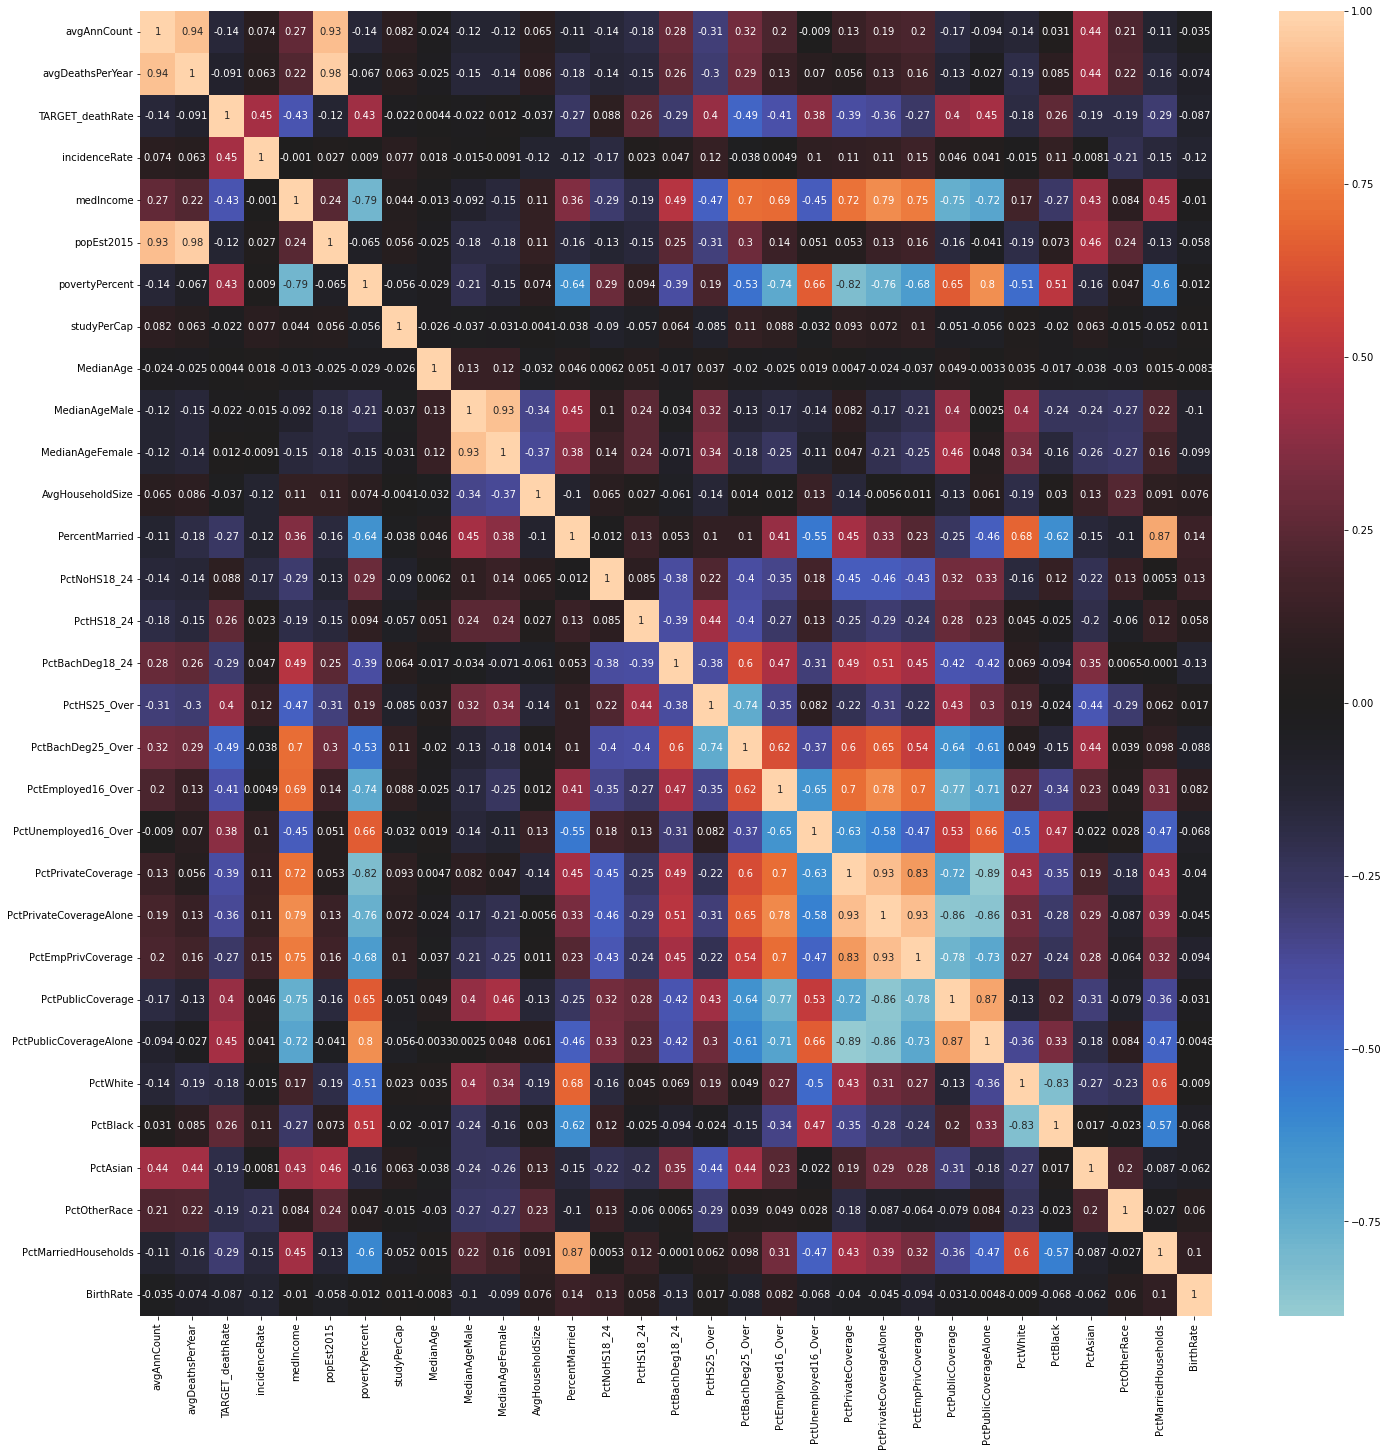

In [30]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,center=0)
plt.show()

**so it Is duplicated data with privatecoverage and I will drop the whole column**

In [341]:
df=df.drop("PctPrivateCoverageAlone",axis=1)

**The next missing value is PctEmployed16_Over**

**which has a good relation with PctPrivateCoverageAlone but we can use privatecoverage or any other features which it has a correlation with like pctprivatecoverage**

**But in order to do that I will use linear regression to predict those missing values**

**so I need the most correlated values and in order to do that:**

In [42]:
pe=df.corr()

In [44]:
pe=pe["PctEmployed16_Over"]

In [46]:
pe.sort_values()

PctPublicCoverage        -0.771217
povertyPercent           -0.736767
PctPublicCoverageAlone   -0.711735
PctUnemployed16_Over     -0.648114
TARGET_deathRate         -0.412046
PctHS25_Over             -0.347321
PctNoHS18_24             -0.345131
PctBlack                 -0.336519
PctHS18_24               -0.269592
MedianAgeFemale          -0.250533
MedianAgeMale            -0.165199
MedianAge                -0.024650
incidenceRate             0.004906
AvgHouseholdSize          0.011824
PctOtherRace              0.048781
BirthRate                 0.082241
studyPerCap               0.088021
avgDeathsPerYear          0.125928
popEst2015                0.140146
avgAnnCount               0.199459
PctAsian                  0.233942
PctWhite                  0.269791
PctMarriedHouseholds      0.314938
PercentMarried            0.405086
PctBachDeg18_24           0.466495
PctBachDeg25_Over         0.616773
medIncome                 0.693432
PctPrivateCoverage        0.698886
PctEmpPrivCoverage  

**I choosed these:**

PctBachDeg18_24           

PctBachDeg25_Over         

medIncome                 

PctPrivateCoverage        

PctEmpPrivCoverage        

PctPublicCoverage        

povertyPercent           

PctPublicCoverageAlone   

PctUnemployed16_Over     

**They are either correlated over .5 or under -.5 wich is usefull**

In [49]:
pe=[]

In [296]:
pe=df[["PctBachDeg18_24",
"PctBachDeg25_Over",
"medIncome",
"PctPrivateCoverage",
"PctEmpPrivCoverage",
"PctPublicCoverage",
"povertyPercent",
"PctPublicCoverageAlone",
"PctUnemployed16_Over",
"PctEmployed16_Over"]]

**I should now seperate the missing values from the others so that those would be my testing values**

In [297]:
missing_values=pe[pe.isnull().any(1)]

In [298]:
pe=pe.dropna()

**Now I will train test split my model to make sure of its results and accuracy**

In [299]:
x=pe.drop("PctEmployed16_Over",axis=1)
y=pe["PctEmployed16_Over"]

In [179]:
from sklearn.model_selection import train_test_split

In [301]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

**I will use sklearn because it is more efficient**

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr=LinearRegression()

In [181]:
prediction=lr.fit(xtrain,ytrain).predict(xtest)

In [106]:
from sklearn import metrics

In [182]:
metrics.mean_squared_error(prediction,ytest)

16.347414710892

In [127]:
pe.describe()

,PctBachDeg18_24,PctBachDeg25_Over,medIncome,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,povertyPercent,PctPublicCoverageAlone,PctUnemployed16_Over,PctEmployed16_Over
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,2895.000000
mean,6.158287,13.282015,47063.281917,64.354939,41.196324,36.252642,16.878175,19.240072,7.852412,54.152642
std,4.529059,5.394756,12040.090836,10.647057,9.447687,7.841741,6.409087,6.113041,3.452371,8.315064
min,0.000000,2.500000,22640.000000,22.300000,13.500000,11.200000,3.200000,2.600000,0.400000,17.600000
25%,3.100000,9.400000,38882.500000,57.200000,34.500000,30.900000,12.150000,14.850000,5.500000,48.600000
50%,5.400000,12.300000,45207.000000,65.100000,41.100000,36.300000,15.900000,18.800000,7.600000,54.500000
75%,8.200000,16.100000,52492.000000,72.100000,47.700000,41.550000,20.400000,23.100000,9.700000,60.300000
max,51.800000,42.200000,125635.000000,92.300000,70.700000,65.100000,47.400000,46.600000,29.400000,80.100000


**So we almost got a 93 percent accuracy wich is good lets apply it on non values**

In [311]:
missing_values["PctEmployed16_Over"]=lr.predict(missing_values.drop("PctEmployed16_Over",axis=1))

In [312]:
missing_values

,PctBachDeg18_24,PctBachDeg25_Over,medIncome,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,povertyPercent,PctPublicCoverageAlone,PctUnemployed16_Over,PctEmployed16_Over
11,3.1,15.9,51395,64.4,38.0,38.1,15.7,20.2,8.2,53.745230
46,5.4,14.5,43729,67.6,48.5,35.7,17.9,18.3,4.9,56.238340
104,9.2,14.8,49517,74.0,39.3,36.1,10.7,16.8,1.7,60.885808
105,3.0,9.2,41344,39.9,26.1,39.1,34.0,28.4,14.4,41.332165
168,2.5,12.8,38221,57.0,32.0,52.6,19.1,30.3,9.7,47.403227
...,...,...,...,...,...,...,...,...,...,...
2986,13.8,13.0,44705,71.8,51.3,30.2,11.7,11.8,6.2,59.748406
2997,2.8,15.3,52791,77.1,50.1,32.5,12.1,14.8,4.8,59.185728
3007,8.2,9.5,42555,65.1,37.0,38.7,14.4,19.5,6.6,54.616792
3038,13.9,26.3,49246,79.3,55.3,19.6,19.4,8.7,6.0,64.114220


In [360]:
for i in missing_values.index:
    df["PctEmployed16_Over"][i]=missing_values["PctEmployed16_Over"][i]

C:\Users\MAHYAR~1\AppData\Local\Temp/ipykernel_3964/3566776199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PctEmployed16_Over"][i]=missing_values["PctEmployed16_Over"][i]


In [361]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,75.9,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [362]:
df.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
Geography                 0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

**Finally I could replace them :)))**

In [372]:
len(df["Geography"].value_counts())

3047

since we have a lot of new incidances it will not help so I will drop this feature

In [410]:
df=df.drop("Geography",axis=1)

**There is no information about binnedinc so I will drop it**

In [404]:
df=df.drop("binnedInc",axis=1)

# Gathering information about datas

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Count'>

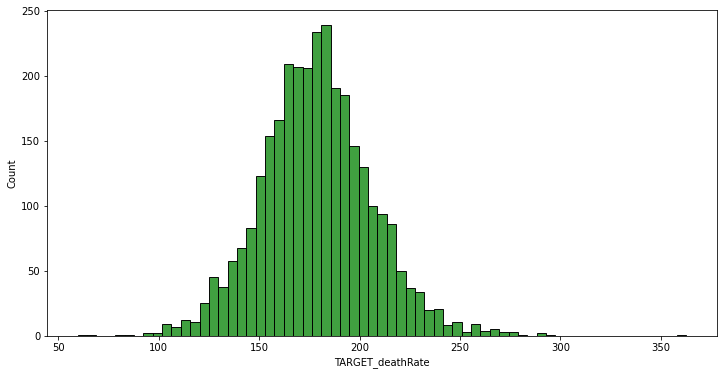

In [374]:
plt.figure(figsize=(12,6))
sns.histplot(df["TARGET_deathRate"],color="green")

**There is no big deal from 300 to 350 but  it seems to be outlier so I will drop those more than 280 and values under 80 because they are less than enough**

In [376]:
for i in range(len(df["TARGET_deathRate"])):
    if df["TARGET_deathRate"][i]>280:
        df=df.drop(i,axis=0)
    elif df["TARGET_deathRate"][i]<80:
        df=df.drop(i,axis=0)

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Count'>

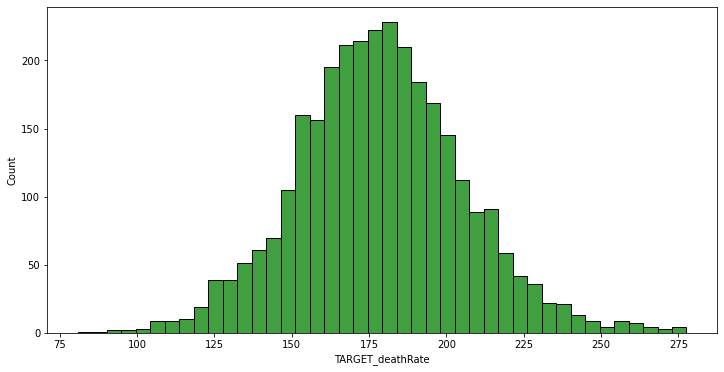

In [377]:
plt.figure(figsize=(12,6))
sns.histplot(df["TARGET_deathRate"],color="green")

**now it is better**

In [391]:
corr=pd.DataFrame(df.corr())

In [392]:
corr=corr["TARGET_deathRate"].sort_values()

In [393]:
corr

PctBachDeg25_Over        -0.489494
medIncome                -0.434671
PctEmployed16_Over       -0.425391
PctPrivateCoverage       -0.395500
PctMarriedHouseholds     -0.300963
PctBachDeg18_24          -0.290641
PctEmpPrivCoverage       -0.275253
PercentMarried           -0.270627
PctOtherRace             -0.192218
PctAsian                 -0.188319
PctWhite                 -0.179733
avgAnnCount              -0.147866
popEst2015               -0.122103
avgDeathsPerYear         -0.092490
BirthRate                -0.087138
AvgHouseholdSize         -0.046505
studyPerCap              -0.023422
MedianAgeMale            -0.023300
MedianAge                 0.005041
MedianAgeFemale           0.015302
PctNoHS18_24              0.096118
PctBlack                  0.259583
PctHS18_24                0.261893
PctUnemployed16_Over      0.386104
PctHS25_Over              0.409402
PctPublicCoverage         0.409718
incidenceRate             0.428844
povertyPercent            0.433109
PctPublicCoverageAlo

**It does not have powerfull correlations inspite of having lots of correlations so if we were on sklearn maybe knn or gradiant boos would work better**

In [412]:
x=df.drop("TARGET_deathRate",axis=1).values
y=df["TARGET_deathRate"].values

In [413]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [401]:
from sklearn.preprocessing import MinMaxScaler

In [402]:
mms=MinMaxScaler()

In [414]:
xtrain=mms.fit_transform(xtrain)

In [415]:
xtest=mms.fit_transform(xtest)

# First Model 

(*no add ons or optimizations*)

In [394]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [398]:
model = Sequential()

In [399]:
xtest.shape

(760, 31)

In [400]:
model.add(Dense(31,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(loss="mse",optimizer="adam")

In [416]:
model.fit(xtrain,ytrain,epochs=800,validation_data=(xtest,ytest))

Epoch 1/800
72/72 [==============================] - 1s 4ms/step - loss: 32151.0098 - val_loss: 32208.3164
Epoch 2/800
72/72 [==============================] - 0s 2ms/step - loss: 28692.6914 - val_loss: 24775.8203
Epoch 3/800
72/72 [==============================] - 0s 2ms/step - loss: 15078.0791 - val_loss: 6018.6387
Epoch 4/800
72/72 [==============================] - 0s 2ms/step - loss: 1720.8479 - val_loss: 884.7453
Epoch 5/800
72/72 [==============================] - 0s 3ms/step - loss: 769.8112 - val_loss: 867.3840
Epoch 6/800
72/72 [==============================] - 0s 2ms/step - loss: 740.4036 - val_loss: 826.4910
Epoch 7/800
72/72 [==============================] - 0s 2ms/step - loss: 711.4731 - val_loss: 793.3192
Epoch 8/800
72/72 [==============================] - 0s 2ms/step - loss: 681.2825 - val_loss: 746.0430
Epoch 9/800
72/72 [==============================] - 0s 2ms/step - loss: 643.1738 - val_loss: 710.5983
Epoch 10/800
72/72 [==============================] - 0s 2ms/

72/72 [==============================] - 0s 2ms/step - loss: 373.3112 - val_loss: 1108.1315
Epoch 80/800
72/72 [==============================] - 0s 2ms/step - loss: 370.5301 - val_loss: 1154.4261
Epoch 81/800
72/72 [==============================] - 0s 2ms/step - loss: 369.1682 - val_loss: 1170.4232
Epoch 82/800
72/72 [==============================] - 0s 2ms/step - loss: 370.8732 - val_loss: 1089.5049
Epoch 83/800
72/72 [==============================] - 0s 2ms/step - loss: 371.9211 - val_loss: 1179.9596
Epoch 84/800
72/72 [==============================] - 0s 2ms/step - loss: 369.3029 - val_loss: 1263.2317
Epoch 85/800
72/72 [==============================] - 0s 2ms/step - loss: 369.9397 - val_loss: 1246.4806
Epoch 86/800
72/72 [==============================] - 0s 2ms/step - loss: 367.5574 - val_loss: 1124.6893
Epoch 87/800
72/72 [==============================] - 0s 2ms/step - loss: 368.8157 - val_loss: 1203.1135
Epoch 88/800
72/72 [==============================] - 0s 2ms/step - 

72/72 [==============================] - 0s 2ms/step - loss: 350.3827 - val_loss: 1203.7592
Epoch 157/800
72/72 [==============================] - 0s 2ms/step - loss: 351.5302 - val_loss: 1428.6815
Epoch 158/800
72/72 [==============================] - 0s 2ms/step - loss: 352.8058 - val_loss: 1172.8455
Epoch 159/800
72/72 [==============================] - 0s 3ms/step - loss: 353.2467 - val_loss: 1380.1099
Epoch 160/800
72/72 [==============================] - 0s 3ms/step - loss: 347.7792 - val_loss: 1276.7710
Epoch 161/800
72/72 [==============================] - 0s 3ms/step - loss: 348.5552 - val_loss: 1281.9537
Epoch 162/800
72/72 [==============================] - 0s 2ms/step - loss: 349.5593 - val_loss: 1172.6174
Epoch 163/800
72/72 [==============================] - 0s 3ms/step - loss: 350.1524 - val_loss: 1332.7688
Epoch 164/800
72/72 [==============================] - 0s 2ms/step - loss: 347.1488 - val_loss: 1137.5796
Epoch 165/800
72/72 [==============================] - 0s 2m

72/72 [==============================] - 0s 2ms/step - loss: 338.2301 - val_loss: 1252.8829
Epoch 234/800
72/72 [==============================] - 0s 2ms/step - loss: 339.1612 - val_loss: 1223.6438
Epoch 235/800
72/72 [==============================] - 0s 2ms/step - loss: 336.6924 - val_loss: 1185.8745
Epoch 236/800
72/72 [==============================] - 0s 2ms/step - loss: 337.4351 - val_loss: 1434.1146
Epoch 237/800
72/72 [==============================] - 0s 2ms/step - loss: 338.7608 - val_loss: 1322.5010
Epoch 238/800
72/72 [==============================] - 0s 2ms/step - loss: 337.3370 - val_loss: 1220.6859
Epoch 239/800
72/72 [==============================] - 0s 2ms/step - loss: 336.8524 - val_loss: 1270.3929
Epoch 240/800
72/72 [==============================] - 0s 2ms/step - loss: 336.2923 - val_loss: 1405.6799
Epoch 241/800
72/72 [==============================] - 0s 2ms/step - loss: 338.8934 - val_loss: 1221.8829
Epoch 242/800
72/72 [==============================] - 0s 2m

72/72 [==============================] - 0s 2ms/step - loss: 331.4864 - val_loss: 1131.9404
Epoch 311/800
72/72 [==============================] - 0s 2ms/step - loss: 329.8097 - val_loss: 1196.9791
Epoch 312/800
72/72 [==============================] - 0s 2ms/step - loss: 329.1400 - val_loss: 1223.4388
Epoch 313/800
72/72 [==============================] - 0s 2ms/step - loss: 327.8315 - val_loss: 1046.1067
Epoch 314/800
72/72 [==============================] - 0s 2ms/step - loss: 330.8374 - val_loss: 1125.8713
Epoch 315/800
72/72 [==============================] - 0s 2ms/step - loss: 329.0760 - val_loss: 1129.6196
Epoch 316/800
72/72 [==============================] - 0s 2ms/step - loss: 329.9847 - val_loss: 1136.0487
Epoch 317/800
72/72 [==============================] - 0s 2ms/step - loss: 328.9697 - val_loss: 1076.5529
Epoch 318/800
72/72 [==============================] - 0s 2ms/step - loss: 334.3159 - val_loss: 1178.2426
Epoch 319/800
72/72 [==============================] - 0s 2m

72/72 [==============================] - 0s 2ms/step - loss: 325.4208 - val_loss: 1166.6470
Epoch 388/800
72/72 [==============================] - 0s 2ms/step - loss: 321.2476 - val_loss: 1120.3812
Epoch 389/800
72/72 [==============================] - 0s 2ms/step - loss: 324.6693 - val_loss: 1191.4036
Epoch 390/800
72/72 [==============================] - 0s 2ms/step - loss: 325.4023 - val_loss: 1295.7094
Epoch 391/800
72/72 [==============================] - 0s 2ms/step - loss: 323.3611 - val_loss: 1126.8220
Epoch 392/800
72/72 [==============================] - 0s 2ms/step - loss: 324.8801 - val_loss: 1120.8306
Epoch 393/800
72/72 [==============================] - 0s 2ms/step - loss: 321.4394 - val_loss: 1181.8057
Epoch 394/800
72/72 [==============================] - 0s 2ms/step - loss: 321.5475 - val_loss: 1167.7463
Epoch 395/800
72/72 [==============================] - 0s 2ms/step - loss: 323.9427 - val_loss: 1101.4850
Epoch 396/800
72/72 [==============================] - 0s 2m

72/72 [==============================] - 0s 2ms/step - loss: 317.6545 - val_loss: 1173.7386
Epoch 465/800
72/72 [==============================] - 0s 2ms/step - loss: 321.2179 - val_loss: 1001.4191
Epoch 466/800
72/72 [==============================] - 0s 2ms/step - loss: 319.4966 - val_loss: 1176.8530
Epoch 467/800
72/72 [==============================] - 0s 2ms/step - loss: 321.0758 - val_loss: 1194.6292
Epoch 468/800
72/72 [==============================] - 0s 1ms/step - loss: 320.1289 - val_loss: 1071.0256
Epoch 469/800
72/72 [==============================] - 0s 2ms/step - loss: 320.6364 - val_loss: 993.3539
Epoch 470/800
72/72 [==============================] - 0s 2ms/step - loss: 319.1967 - val_loss: 1084.7769
Epoch 471/800
72/72 [==============================] - 0s 2ms/step - loss: 316.8447 - val_loss: 1192.9999
Epoch 472/800
72/72 [==============================] - 0s 2ms/step - loss: 316.9058 - val_loss: 1147.7902
Epoch 473/800
72/72 [==============================] - 0s 2ms

72/72 [==============================] - 0s 2ms/step - loss: 311.0011 - val_loss: 1044.7539
Epoch 542/800
72/72 [==============================] - 0s 2ms/step - loss: 314.7935 - val_loss: 1098.0787
Epoch 543/800
72/72 [==============================] - 0s 2ms/step - loss: 314.0266 - val_loss: 1115.4133
Epoch 544/800
72/72 [==============================] - 0s 2ms/step - loss: 313.0373 - val_loss: 1036.7799
Epoch 545/800
72/72 [==============================] - 0s 2ms/step - loss: 315.0739 - val_loss: 1085.9298
Epoch 546/800
72/72 [==============================] - 0s 2ms/step - loss: 313.3153 - val_loss: 1206.5750
Epoch 547/800
72/72 [==============================] - 0s 2ms/step - loss: 314.8112 - val_loss: 1215.4254
Epoch 548/800
72/72 [==============================] - 0s 2ms/step - loss: 315.3800 - val_loss: 1043.1587
Epoch 549/800
72/72 [==============================] - 0s 2ms/step - loss: 314.8892 - val_loss: 1043.4631
Epoch 550/800
72/72 [==============================] - 0s 2m

72/72 [==============================] - 0s 2ms/step - loss: 311.3071 - val_loss: 1087.3887
Epoch 619/800
72/72 [==============================] - 0s 1ms/step - loss: 310.8078 - val_loss: 1076.4683
Epoch 620/800
72/72 [==============================] - 0s 2ms/step - loss: 309.7610 - val_loss: 971.7368
Epoch 621/800
72/72 [==============================] - 0s 2ms/step - loss: 310.8245 - val_loss: 1131.3262
Epoch 622/800
72/72 [==============================] - 0s 2ms/step - loss: 313.3946 - val_loss: 966.3898
Epoch 623/800
72/72 [==============================] - 0s 2ms/step - loss: 312.0662 - val_loss: 1036.3624
Epoch 624/800
72/72 [==============================] - 0s 2ms/step - loss: 312.5224 - val_loss: 1043.0654
Epoch 625/800
72/72 [==============================] - 0s 2ms/step - loss: 311.6599 - val_loss: 1168.5504
Epoch 626/800
72/72 [==============================] - 0s 2ms/step - loss: 313.0826 - val_loss: 1027.2002
Epoch 627/800
72/72 [==============================] - 0s 2ms/

72/72 [==============================] - 0s 2ms/step - loss: 310.4393 - val_loss: 1046.3760
Epoch 696/800
72/72 [==============================] - 0s 2ms/step - loss: 312.5519 - val_loss: 1074.3416
Epoch 697/800
72/72 [==============================] - 0s 2ms/step - loss: 307.9142 - val_loss: 1120.1836
Epoch 698/800
72/72 [==============================] - 0s 2ms/step - loss: 309.8395 - val_loss: 1015.7155
Epoch 699/800
72/72 [==============================] - 0s 2ms/step - loss: 309.3355 - val_loss: 1125.3805
Epoch 700/800
72/72 [==============================] - 0s 2ms/step - loss: 309.7330 - val_loss: 1174.7314
Epoch 701/800
72/72 [==============================] - 0s 2ms/step - loss: 309.6552 - val_loss: 1237.6226
Epoch 702/800
72/72 [==============================] - 0s 2ms/step - loss: 309.4270 - val_loss: 1093.5988
Epoch 703/800
72/72 [==============================] - 0s 2ms/step - loss: 309.3874 - val_loss: 1198.7247
Epoch 704/800
72/72 [==============================] - 0s 2m

72/72 [==============================] - ETA: 0s - loss: 314.276 - 0s 2ms/step - loss: 307.3029 - val_loss: 1182.7473
Epoch 773/800
72/72 [==============================] - 0s 2ms/step - loss: 306.1990 - val_loss: 1154.3989
Epoch 774/800
72/72 [==============================] - 0s 1ms/step - loss: 306.6342 - val_loss: 1110.5092
Epoch 775/800
72/72 [==============================] - 0s 2ms/step - loss: 307.6486 - val_loss: 1283.1196
Epoch 776/800
72/72 [==============================] - 0s 2ms/step - loss: 306.3015 - val_loss: 975.6205
Epoch 777/800
72/72 [==============================] - 0s 2ms/step - loss: 310.7759 - val_loss: 1096.1987
Epoch 778/800
72/72 [==============================] - 0s 2ms/step - loss: 306.3568 - val_loss: 1167.6274
Epoch 779/800
72/72 [==============================] - 0s 2ms/step - loss: 307.0540 - val_loss: 1263.5219
Epoch 780/800
72/72 [==============================] - 0s 2ms/step - loss: 308.1857 - val_loss: 1180.1614
Epoch 781/800
72/72 [==============

In [417]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

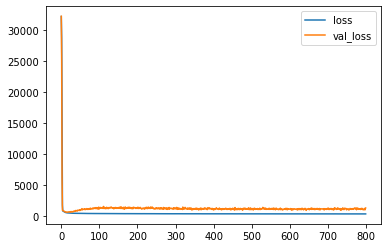

In [418]:
loss.plot()

**Well it seems to work really good if we close an eye on the curve below lets evaluate**

# First Evaluation

In [419]:
prediction=model.predict(xtest)

In [421]:
metrics.mean_squared_error(prediction,ytest)**.5

35.44560928646697

In [423]:
df["TARGET_deathRate"].describe()

count    3040.000000
mean      178.533191
std        27.122025
min        80.800000
25%       161.200000
50%       178.100000
75%       195.200000
max       277.600000
Name: TARGET_deathRate, dtype: float64

**well we have got a 34/178= 19 percent error wich really worked better than a usual regression or knn model let's make it better**

# Second Model

(*using early call backs*)

In [425]:
from tensorflow.keras.callbacks import EarlyStopping

In [427]:
es=EarlyStopping(patience=20)

In [429]:
model.add(Dense(31,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(loss="mse",optimizer="adam")

In [430]:
model.fit(xtrain,ytrain,epochs=800,validation_data=(xtest,ytest),callbacks=[es])

Epoch 1/800
72/72 [==============================] - 1s 5ms/step - loss: 32448.1895 - val_loss: 33110.4648
Epoch 2/800
72/72 [==============================] - 0s 3ms/step - loss: 32303.0176 - val_loss: 32941.6484
Epoch 3/800
72/72 [==============================] - 0s 2ms/step - loss: 31977.3398 - val_loss: 32333.8535
Epoch 4/800
72/72 [==============================] - 0s 3ms/step - loss: 30725.9434 - val_loss: 30027.9297
Epoch 5/800
72/72 [==============================] - 0s 3ms/step - loss: 26500.8887 - val_loss: 22987.8320
Epoch 6/800
72/72 [==============================] - 0s 2ms/step - loss: 16188.9268 - val_loss: 9367.7568
Epoch 7/800
72/72 [==============================] - 0s 3ms/step - loss: 3990.1052 - val_loss: 1117.2516
Epoch 8/800
72/72 [==============================] - 0s 3ms/step - loss: 780.6629 - val_loss: 760.8873
Epoch 9/800
72/72 [==============================] - 0s 2ms/step - loss: 727.8364 - val_loss: 760.3383
Epoch 10/800
72/72 [============================

In [431]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

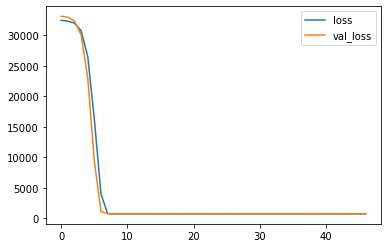

In [432]:
loss.plot()

**This is the great there is no gap between plots at the lower bounds**

# Second Evaluation

In [433]:
prediction1=model.predict(xtest)

In [435]:
metrics.mean_squared_error(prediction1,ytest)**.5

27.542358116044888

**we are now have ing a 15 percent error rate**

# Third Model 

(*adding dropouts*)

In [437]:
from tensorflow.keras.layers import Dropout

In [438]:
model.add(Dense(31,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(15,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(4,activation="relu"))
model.add(Dropout(.2))

model.add(Dense(1))

model.compile(loss="mse",optimizer="adam")

In [439]:
model.fit(xtrain,ytrain,epochs=800,validation_data=(xtest,ytest),callbacks=[es])

Epoch 1/800
72/72 [==============================] - 1s 7ms/step - loss: 17335.6035 - val_loss: 2926.8718
Epoch 2/800
72/72 [==============================] - 0s 5ms/step - loss: 8389.9795 - val_loss: 3382.1316
Epoch 3/800
72/72 [==============================] - 0s 3ms/step - loss: 6954.3037 - val_loss: 3389.1306
Epoch 4/800
72/72 [==============================] - 0s 4ms/step - loss: 5953.9209 - val_loss: 3361.6592
Epoch 5/800
72/72 [==============================] - 0s 2ms/step - loss: 6068.8589 - val_loss: 2534.9482
Epoch 6/800
72/72 [==============================] - 0s 3ms/step - loss: 5308.4424 - val_loss: 2530.6970
Epoch 7/800
72/72 [==============================] - 0s 4ms/step - loss: 4854.5508 - val_loss: 2573.2725
Epoch 8/800
72/72 [==============================] - 0s 3ms/step - loss: 4678.0967 - val_loss: 2108.4382
Epoch 9/800
72/72 [==============================] - 0s 3ms/step - loss: 4224.7456 - val_loss: 2783.3335
Epoch 10/800
72/72 [==============================] - 

In [440]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

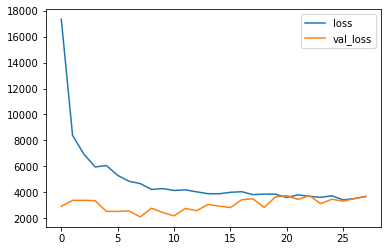

In [441]:
loss.plot()

**It did not work well it forced our validation score to go higher**

# Third Evaluation

In [442]:
prediction2=model.predict(xtest)

In [443]:
metrics.mean_squared_error(prediction2,ytest)**.5

60.66073083512567

**It gave us a 34 precent error rate showing that reducing nodes is not a useful way for this model**

# Forth model
(*adding batch and lowering the amount of data feeded to the network*)

In [445]:
model.add(Dense(31,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(loss="mse",optimizer="adam")

In [446]:
model.fit(xtrain,ytrain,epochs=800,validation_data=(xtest,ytest),callbacks=[es],batch_size=256)

Epoch 1/800
9/9 [==============================] - 1s 34ms/step - loss: 31994.7402 - val_loss: 32105.8262
Epoch 2/800
9/9 [==============================] - 0s 8ms/step - loss: 30782.6992 - val_loss: 31420.9531
Epoch 3/800
9/9 [==============================] - 0s 8ms/step - loss: 29587.8535 - val_loss: 29774.7793
Epoch 4/800
9/9 [==============================] - 0s 8ms/step - loss: 27164.4512 - val_loss: 26314.7949
Epoch 5/800
9/9 [==============================] - 0s 7ms/step - loss: 22656.6211 - val_loss: 19830.9219
Epoch 6/800
9/9 [==============================] - 0s 9ms/step - loss: 14834.7666 - val_loss: 9849.0352
Epoch 7/800
9/9 [==============================] - 0s 7ms/step - loss: 6241.7705 - val_loss: 1452.1052
Epoch 8/800
9/9 [==============================] - 0s 8ms/step - loss: 4495.1309 - val_loss: 790.0573
Epoch 9/800
9/9 [==============================] - 0s 8ms/step - loss: 4334.9741 - val_loss: 1302.2584
Epoch 10/800
9/9 [==============================] - 0s 9ms/ste

In [447]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

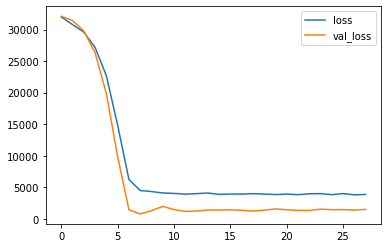

In [448]:
loss.plot()

**We have a lower validation score wich show that our model is under fitted we can notice it from the rate of orange plot too**

# Forth Evaluation

In [450]:
prediction3=model.predict(xtest)

In [453]:
metrics.mean_squared_error(prediction3,ytest)**.5

38.78192356610146

**So we got a 20 percent error rate wich is not good for a neural network**

**So this was the whole project bu**